In [12]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\BTC-USD.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/04/2021,58926.56250,59586.07031,58505.27734,59095.80859,59095.80859,6.166916e+10
1,02/04/2021,59098.87891,60267.18750,58869.28125,59384.31250,59384.31250,5.872786e+10
2,03/04/2021,59397.41016,60110.26953,57603.89063,57603.89063,57603.89063,5.964134e+10
3,04/04/2021,57604.83984,58913.74609,57168.67578,58758.55469,58758.55469,5.074966e+10
4,05/04/2021,58760.87500,59891.29688,57694.82422,59057.87891,59057.87891,6.070627e+10


In [14]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
360,27/03/2022,44505.35547,46827.54688,44437.29297,46820.49219,46820.49219,2.816089e+10
361,28/03/2022,46821.85156,48086.83594,46690.20313,47128.00391,47128.00391,3.636218e+10
362,29/03/2022,47100.43750,48022.28906,47100.43750,47465.73047,47465.73047,3.139706e+10
363,30/03/2022,47456.89844,47655.14844,46746.21094,47062.66406,47062.66406,2.933388e+10
364,31/03/2022,47062.14844,47512.02734,45390.53906,45538.67578,45538.67578,3.332743e+10


In [20]:
data = dataset[['Adj Close']]
data.head()

,Adj Close
0,59095.80859
1,59384.31250
2,57603.89063
3,58758.55469
4,59057.87891


In [21]:
data.describe().round(2)

,Adj Close
count,365.00
mean,46444.43
std,9102.67
min,29807.35
25%,39105.15
50%,45538.68
75%,53805.98
max,67566.83


array([<AxesSubplot:>], dtype=object)

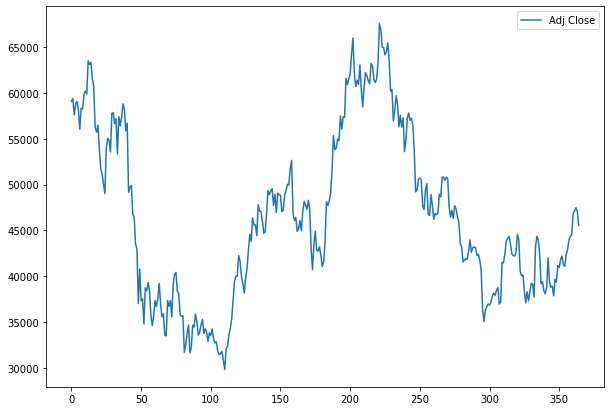

In [22]:
data.plot(figsize=(10, 7), subplots=True)

In [23]:
log = np.log(dataset['Adj Close']/dataset['Adj Close'].shift())
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/04/2021,58926.56250,59586.07031,58505.27734,59095.80859,59095.80859,6.166916e+10
1,02/04/2021,59098.87891,60267.18750,58869.28125,59384.31250,59384.31250,5.872786e+10
2,03/04/2021,59397.41016,60110.26953,57603.89063,57603.89063,57603.89063,5.964134e+10
3,04/04/2021,57604.83984,58913.74609,57168.67578,58758.55469,58758.55469,5.074966e+10
4,05/04/2021,58760.87500,59891.29688,57694.82422,59057.87891,59057.87891,6.070627e+10


In [24]:
vol = log.std()
print('The daily volatility is', round(vol*100,2), '%')

The daily volatility is 3.87 %


In [25]:
vol = np.sqrt(252) * log.std()  #annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 61.47 %


In [27]:
first_six_vol = round(dataset['Adj Close'][:145].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') # first six months volatility

The first six months volatility is 70.12 %


In [26]:
last_six_vol = round(dataset['Adj Close'][110:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')   # last six months volatility

The last six months volatility is 55.34 %


In [28]:
A = dataset['Adj Close'][1]
print('The spot price is', round(A,1))

The spot price is 59384.3


In [54]:
S0 = 59384             # spot stock price
K = 100               # strike price
T = 1.0                # time to maturity 
r = 0.0145             # risk free rate 
sig = 0.6147           # annaulised volatility
N = 4                  # number of time steps of the tree
payoff = "call"

In [55]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up probability factor
d = 1.0 / u 

In [56]:
A = np.zeros((N + 1, N + 1))
A[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        A[i, t] = A[i, t-1] * u
        A[i+1, t] = A[i, t-1] * d
    z += 1

In [57]:
A

array([[ 59384.        ,  80751.36207927, 109807.06044823,
        149317.48782694, 203044.43156878],
       [     0.        ,  43670.58790337,  59384.        ,
         80751.36207927, 109807.06044823],
       [     0.        ,      0.        ,  32115.05199761,
         43670.58790337,  59384.        ],
       [     0.        ,      0.        ,      0.        ,
         23617.18983705,  32115.05199761],
       [     0.        ,      0.        ,      0.        ,
             0.        ,  17367.92005944]])

In [58]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # probability of the price of underlying asset going up
q = 1.0 - p           # probability of the price of underlying asset going down
p

0.4295775936172961

In [59]:
q

0.5704224063827039

In [60]:
A_T = A[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(A_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-A_T, 0.0)
V

array([[     0.        ,      0.        ,      0.        ,
             0.        , 202944.43156878],
       [     0.        ,      0.        ,      0.        ,
             0.        , 109707.06044823],
       [     0.        ,      0.        ,      0.        ,
             0.        ,  59284.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,  32015.05199761],
       [     0.        ,      0.        ,      0.        ,
             0.        ,  17267.92005944]])

In [61]:
# for European call Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 59285.43953813,  80652.44368737, 109707.78282644,
        149217.8496707 , 202944.43156878],
       [     0.        ,  43571.66951147,  59284.72237821,
         80651.72392303, 109707.06044823],
       [     0.        ,      0.        ,  32015.77437583,
         43570.94974714,  59284.        ],
       [     0.        ,      0.        ,      0.        ,
         23517.55168081,  32015.05199761],
       [     0.        ,      0.        ,      0.        ,
             0.        ,  17267.92005944]])

In [62]:
print('European ' + payoff, str( V[0,0]))

European call 59285.43953812675


In [63]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [64]:
T = 1
r = 0.0145
sigma = 0.6147
S0 = 59384
K = 100

In [65]:
S = mcs_simulation_np(1000)

In [66]:
S = np.transpose(S)

In [67]:
S

array([[ 59384.        ,  59866.25318264,  60122.28394684, ...,
         36979.98057417,  37515.7838461 ,  37374.21617966],
       [ 59384.        ,  60551.716901  ,  60265.82552746, ...,
         94920.83494358,  94282.82487875,  94774.90269721],
       [ 59384.        ,  58971.22938836,  59061.03649847, ...,
         30582.84117019,  31642.77957296,  30798.69887829],
       ...,
       [ 59384.        ,  60579.29572332,  60448.88126844, ...,
        117196.5715815 , 117929.82923677, 121989.30685116],
       [ 59384.        ,  59470.43007112,  58606.89267399, ...,
        234619.9350174 , 238462.15391934, 250151.19432099],
       [ 59384.        ,  58827.16391481,  59383.93265667, ...,
         34356.96418408,  34364.99212036,  35075.128846  ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

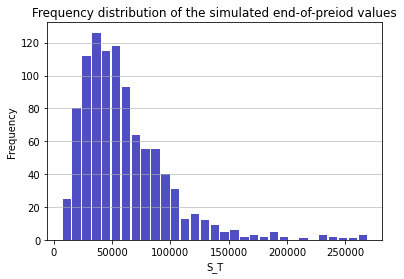

In [68]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [78]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 0.0


In [79]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [82]:
delta(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')

0.5652992737600607

In [83]:
S = np.linspace(180, 370, 21) #plotting the 3d graph of delta
T = np.linspace(0.5, 2, 21)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 100, T[i], 0.0145, 0.5704, 0.6147, 'call')

C:\Users\akhil\AppData\Local\Temp/ipykernel_25640/484774664.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


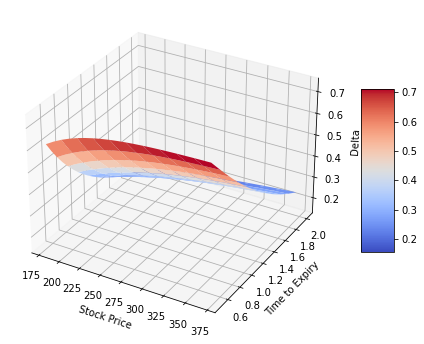

In [84]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [85]:
S = np.linspace(180,370,11)  #plotting the 2d graph 
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 59384, 1, 0.0145, 0.5704, 0.6147, 'call')

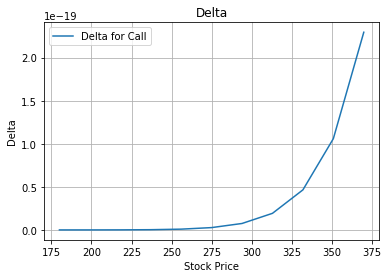

In [86]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [87]:
d = delta(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5653 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5653 .


In [88]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [89]:
gamma(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')

9.260640563492751e-27

In [94]:
S = np.linspace(180, 370, 21) #plotting the 3d graph of delta
T = np.linspace(0.5, 2, 21)
Gamma= np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 100, T[i], 0.0145, 0.5704, 0.6147, 'call')

C:\Users\akhil\AppData\Local\Temp/ipykernel_25640/3248754200.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


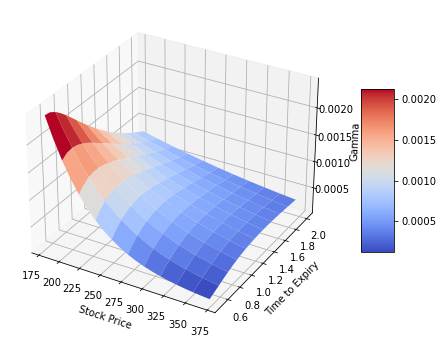

In [95]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [96]:
S = np.linspace(180,370,11)  #plotting the 2d graph 
Gamma_Call = np.zeros((len(S),1))
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma_Call [i] = gamma(S[i], 59384, 1, 0.0145, 0.5704, 0.6147, 'call')

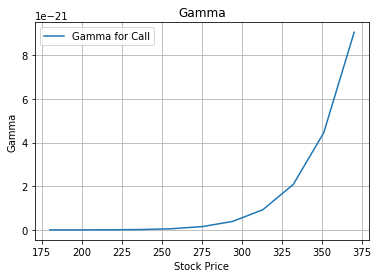

In [97]:
fig = plt.figure()
plt.plot(S, Gamma_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [100]:
d = gamma(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')
print('The value of Gamma is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Gamma is 0.0 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.0 .


In [101]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [102]:
theta(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')

-19146.746047723467

In [106]:
S = np.linspace(180, 370, 21)  #plotting the 3d graph
T = np.linspace(0.5, 2, 21)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 100, T[i], 0.0145, 0.5704, 0.6147, 'call')

C:\Users\akhil\AppData\Local\Temp/ipykernel_25640/2274271052.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


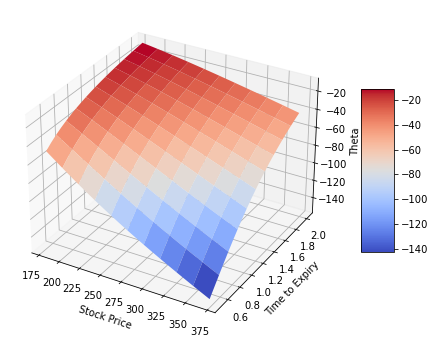

In [107]:
fig = plt.figure(figsize=(10, 6))    #dimensions of thr graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [110]:
T = np.linspace(0.25,3,12)   #plotting the 2d graph
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(59384, 100, T[i], 0.0145, 0.5704, 0.6107, 'call')

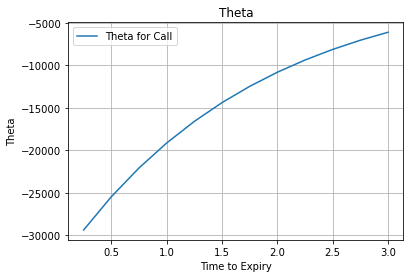

In [111]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [112]:
t = theta(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')
print('The value of Theta is', t.round(4),'.','If the time increases 1 year, then the value of the option will increase $', t.round(4)*0.01, '.')

The value of Theta is -19146.746 . If the time increases 1 year, then the value of the option will increase $ -191.46746 .


In [113]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [114]:
vega(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')

2.0074426010458778e-17

In [115]:
S = np.linspace(180, 370, 21) #plotting the 3d graph
T = np.linspace(0.5, 2, 31)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 100, T[i], 0.0145, 0.5704, 0.6147, 'call')

C:\Users\akhil\AppData\Local\Temp/ipykernel_25640/4011178348.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


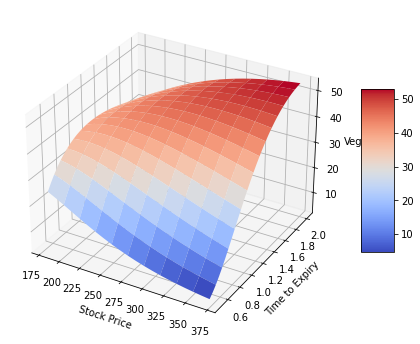

In [116]:
fig = plt.figure(figsize=(10, 6)) #dimensins of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [119]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [120]:
rho(59384, 100, 1, 0.0145, 0.5704, 0.6147, 'call')

98.56046187323824

In [121]:
S = np.linspace(180, 370, 21) #plotting the 3d graph of rho
T = np.linspace(0.5, 2, 21)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 100, T[i], 0.0145, 0.5704, 0.6107, 'call')

C:\Users\akhil\AppData\Local\Temp/ipykernel_25640/286701165.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


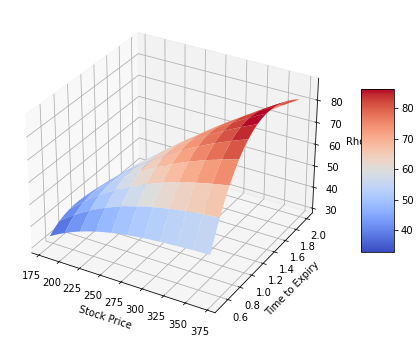

In [122]:
fig = plt.figure(figsize=(10, 6))  #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);